### Function approximation

The aim of this little notebook is to show the power of neural network modelling. We pick an <br>arbitrary function and by choosing many points of this function we teach the model the <br>reproduce any point in the function.

The function we use can be seen below:

f(x)=0.2+0.4x2+0.3xsin(15x)+0.05cos(50x), <br><br>which can be represented in the following form in python:<br><br>
0.2 + 0.4 * X**2 + 0.3 * X * np.sin(15*X) + 0.05 * np.cos(50*X)   

In order to produce multiple outputs from one code cell we need the following code block:

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

We import the necessary python modules like so:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random 

Since we use the keras module of python for computation we have to prepare<br>the data in correct form for input.<br>We generate 20000 random numbers between 0 and 1 - these are going to be <br>the the elements of the feature matrix X.

In [3]:
# feature matrix X
N = 20000
X = [random.uniform(0, 1) for i in range(N)]
X = np.sort(X).reshape(-1, 1)
X[:3]
X.shape

array([[4.12551252e-06],
       [2.04062814e-04],
       [5.21640909e-04]])

(20000, 1)

In [4]:
# target vector y
y = [0.2 + 0.4 * X**2 + 0.3 * X * np.sin(15*X) + 0.05 * np.cos(50*X) for i in range(1)]
y = np.array(y).reshape(-1, 1)
y[:3]
y.shape

array([[0.25      ],
       [0.2499976 ],
       [0.24998433]])

(20000, 1)

Text(0.5, 0, 'Angle [rad]')

Text(0, 0.5, 'sin(x)')

(-0.04999467529925308,
 1.0499789425597508,
 0.05734036053698658,
 0.8907495525153755)

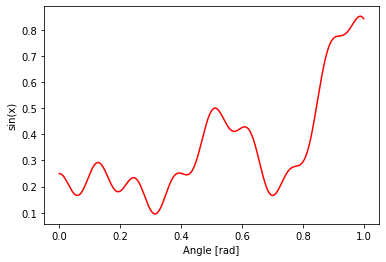

In [5]:
# plotting the curves
#import matplotlib.pylab as plt

#pred = model.predict(X)

plt.plot(X, y, 'r-')
#plt.plot(X, pred, 'b--')


plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

In [6]:
X.shape

(20000, 1)

In [7]:
y.shape

(20000, 1)

In [8]:
from sklearn import preprocessing

In [9]:
#min_max_scaler = preprocessing.MinMaxScaler()
#X_scale = min_max_scaler.fit_transform(X)
#y_scale = min_max_scaler.fit_transform(y)


In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras.optimizers import Adam

In [11]:
model = Sequential()
model.add(Dense(100, input_shape = (1,), kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(1))

In [12]:
# compile the keras model
model.compile(loss='mse', optimizer= Adam(), metrics=['accuracy'])


In [19]:
# fit the keras model on the dataset
model.fit(X, y, epochs=100, batch_size=30)

Epoch 1/100
667/667 [==============================] - 1s 1ms/step - loss: 2.7821e-04 - accuracy: 0.0000e+00
Epoch 2/100
667/667 [==============================] - 1s 1ms/step - loss: 3.0448e-04 - accuracy: 0.0000e+00
Epoch 3/100
667/667 [==============================] - 1s 1ms/step - loss: 2.6400e-04 - accuracy: 0.0000e+00
Epoch 4/100
667/667 [==============================] - 1s 1ms/step - loss: 3.0596e-04 - accuracy: 0.0000e+00
Epoch 5/100
667/667 [==============================] - 1s 1ms/step - loss: 3.1185e-04 - accuracy: 0.0000e+00
Epoch 6/100
667/667 [==============================] - 1s 1ms/step - loss: 2.8588e-04 - accuracy: 0.0000e+00
Epoch 7/100
667/667 [==============================] - 1s 1ms/step - loss: 2.7749e-04 - accuracy: 0.0000e+00
Epoch 8/100
667/667 [==============================] - 1s 1ms/step - loss: 2.6178e-04 - accuracy: 0.0000e+00
Epoch 9/100
667/667 [==============================] - 1s 1ms/step - loss: 2.5865e-04 - accuracy: 0.0000e+00
Epoch 10/100
667/66

667/667 [==============================] - 1s 1ms/step - loss: 1.7379e-04 - accuracy: 0.0000e+00
Epoch 76/100
667/667 [==============================] - 1s 1ms/step - loss: 1.6756e-04 - accuracy: 0.0000e+00
Epoch 77/100
667/667 [==============================] - 1s 1ms/step - loss: 1.7635e-04 - accuracy: 0.0000e+00
Epoch 78/100
667/667 [==============================] - 1s 1ms/step - loss: 1.7659e-04 - accuracy: 0.0000e+00
Epoch 79/100
667/667 [==============================] - 1s 2ms/step - loss: 1.5726e-04 - accuracy: 0.0000e+00
Epoch 80/100
667/667 [==============================] - 1s 1ms/step - loss: 1.8338e-04 - accuracy: 0.0000e+00
Epoch 81/100
667/667 [==============================] - 1s 1ms/step - loss: 1.5991e-04 - accuracy: 0.0000e+00
Epoch 82/100
667/667 [==============================] - 1s 1ms/step - loss: 1.6212e-04 - accuracy: 0.0000e+00
Epoch 83/100
667/667 [==============================] - 1s 1ms/step - loss: 1.4841e-04 - accuracy: 0.0000e+00
Epoch 84/100
667/667 [=

In [14]:
# evaluate the keras model
# no point to evaluate an approximation
#_, accuracy = model.evaluate(X_scale, y_scale)
#print('Accuracy: %.2f' % (accuracy*100))

Text(0.5, 0, 'Angle [rad]')

Text(0, 0.5, 'sin(x)')

(-0.04999467529925308,
 1.0499789425597508,
 0.05668055507977216,
 0.8907809718228619)

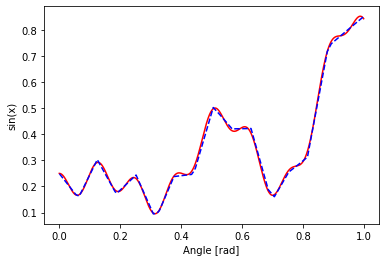

In [22]:
# plotting the curves
import matplotlib.pylab as plt

pred = model.predict(X)

plt.plot(X, y, 'r-')
plt.plot(X, pred, 'b--')


plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

Text(0.5, 0, 'Angle [rad]')

Text(0, 0.5, 'sin(x)')

(-0.04999467529925308,
 1.0499789425597508,
 0.05668055507977216,
 0.8907809718228619)

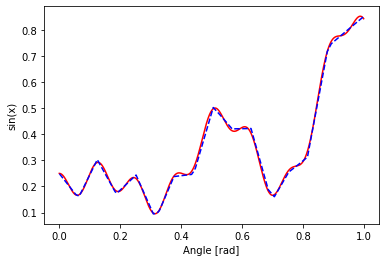

In [23]:
# plotting the curves
import matplotlib.pyplot as plt

pred = model.predict(X)

plt.plot(X, y, 'r-')
plt.plot(X, pred, 'b--')


plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

In [ ]:
# check some predictions:
model.predict([-5])

array([[2.1780896]], dtype=float32)

In [ ]:
# make probability predictions with the model
predictions = model.predict(X)
# round predictions 
rounded = [round(x[0]) for x in predictions]

Text(0.5, 0, 'Angle [rad]')

Text(0, 0.5, 'sin(x)')

(-0.049883553001048214,
 1.0499793063640128,
 0.05734032108666172,
 0.8907500518203215)

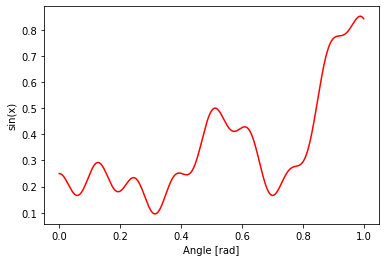

In [ ]:
import matplotlib.pylab as plt

pred = model.predict(X) 

plt.plot(X, y, 'r-')
#plt.plot(X, pred, 'b--')


plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

In [ ]:
type(pred)

numpy.ndarray

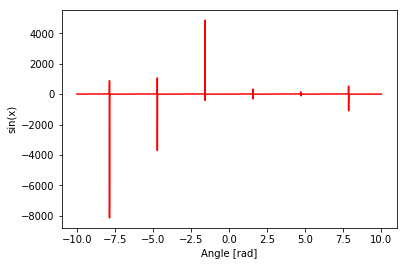

In [ ]:


# target vector y
z = [np.sin(X[i]) / np.cos(X[i]) for i in range(N)]
z = np.array(z).reshape(-1, 1)

pred = model.predict(X)

plt.plot(X, z, 'r-')
#plt.plot(X, pred, 'b--')


plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

model.predict([22])

N = 5000
X = [random.uniform(-10, 10) for i in range(N)]
X = np.sort(X).reshape(-1, 1)
X[:5]